In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('insurance.csv')

In [14]:
dataset.describe()

,age,sex,bmi,children,smoker,charges,Smoker*bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,6.288576
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,12.721374
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,52.580000


In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


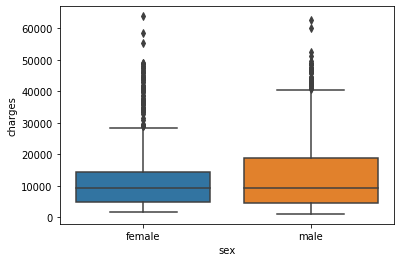

In [4]:
ax = sns.boxplot(x="sex", y="charges", data=dataset)

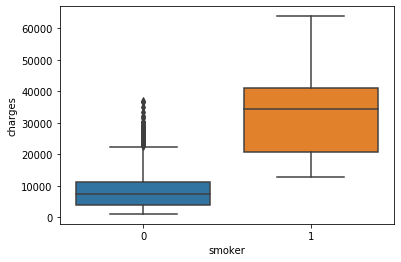

In [15]:
ax = sns.boxplot(x="smoker", y="charges", data=dataset)

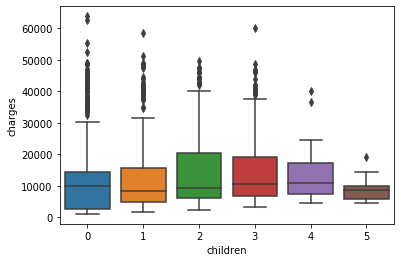

In [5]:
ax = sns.boxplot(x="children", y="charges", data=dataset)

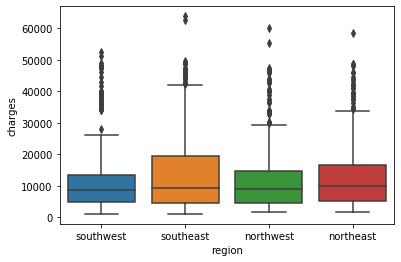

In [6]:
ax = sns.boxplot(x="region", y="charges", data=dataset)

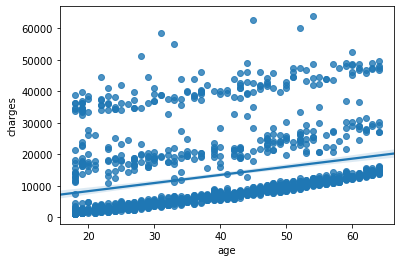

In [8]:
sns.regplot(x="age", y="charges", data=dataset)

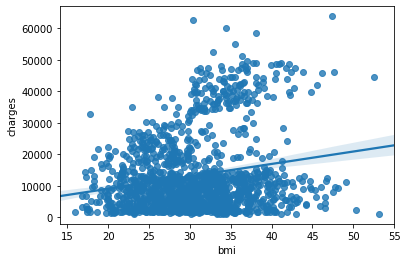

In [10]:
sns.regplot(x="bmi", y="charges", data=dataset)

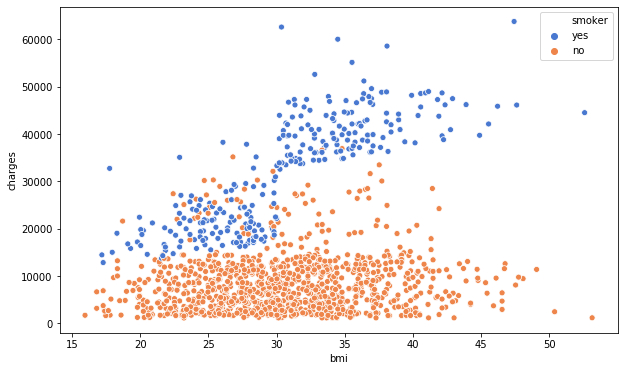

In [13]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=dataset,palette='muted',hue='smoker')

In [4]:
from sklearn.preprocessing import LabelEncoder
#sex
labelencoder = LabelEncoder()
labelencoder.fit(dataset.sex.drop_duplicates()) 
dataset.sex = labelencoder.transform(dataset.sex)
# smoker or not
labelencoder.fit(dataset.smoker.drop_duplicates()) 
dataset.smoker = labelencoder.transform(dataset.smoker)

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [6]:
dataset["Smoker*bmi"] = dataset["smoker"] * dataset["bmi"]

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,Smoker*bmi
0,19,0,27.900,0,1,southwest,16884.92400,27.9
1,18,1,33.770,1,0,southeast,1725.55230,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'bmi'),
 Text(3.5, 0, 'children'),
 Text(4.5, 0, 'smoker'),
 Text(5.5, 0, 'charges'),
 Text(6.5, 0, 'Smoker*bmi')]

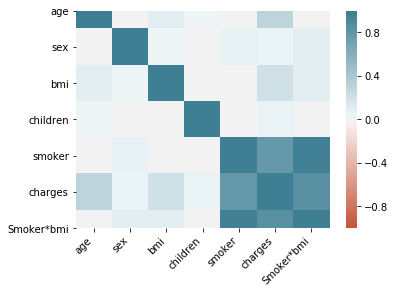

In [8]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [9]:
dataset.corr()['charges'].sort_values()

sex           0.057292
children      0.067998
bmi           0.198341
age           0.299008
smoker        0.787251
Smoker*bmi    0.845120
charges       1.000000
Name: charges, dtype: float64

In [39]:
X = dataset.iloc[:,[0,7]].values
Y = dataset.iloc[:,6:7].values
X.shape

(1338, 2)

In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,Smoker*bmi
0,19,0,27.900,0,1,southwest,16884.92400,27.9
1,18,1,33.770,1,0,southeast,1725.55230,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0


In [40]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     2906.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:54:32   Log-Likelihood:                -13355.
No. Observations:                1338   AIC:                         2.672e+04
Df Residuals:                    1335   BIC:                         2.673e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2456.5360    431.755     -5.690      0.000   -3303.527   -1609.545
x1           271.2050     10.197     26.595      0.000     251.200     291.210
x2           810.0113     11.262     71.921      0.000     787.917     832.105
==============================================================================
Omnibus:                      545.869   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2450.053
Skew:                           1.915   Prob(JB):                         0.00
Kurtosis:                       8.411   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X = dataset.iloc[:,[0,2,7]].values
Y = dataset.iloc[:,6:7].values
X.shape

(1338, 3)

In [50]:
import statsmodels.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     2004.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:50:23   Log-Likelihood:                -13336.
No. Observations:                1338   AIC:                         2.668e+04
Df Residuals:                    1334   BIC:                         2.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6590.1481    791.267     -8.329      0.000   -8142.411   -5037.885
x1           264.1819     10.121     26.102      0.000     244.327     284.037
x2           145.3692     23.454      6.198      0.000      99.359     191.379
x3           802.2911     11.177     71.777      0.000     780.364     824.219
==============================================================================
Omnibus:                      580.348   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2723.438
Skew:                           2.040   Prob(JB):                         0.00
Kurtosis:                       8.675   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""